# Introduction to pandas, visualizing Titanic

## Master 2 TSE

#### Raphaël Sourty

In [9]:
import pandas as pd

#### You can download the data here: https://www.kaggle.com/c/titanic/data

In [16]:
df = pd.read_csv('/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| Variable 	| Definition                                 	| Key                                            	|
|----------	|--------------------------------------------	|------------------------------------------------	|
| survival 	| Survival                                   	| 0 = No, 1 = Yes                                	|
| pclass   	| Ticket class                               	| 1 = 1st, 2 = 2nd, 3 = 3rd                      	|
| sex      	| Sex                                        	|                                                	|
| Age      	| Age in years                               	|                                                	|
| sibsp    	| # of siblings / spouses aboard the Titanic 	|                                                	|
| parch    	| # of parents / children aboard the Titanic 	|                                                	|
| ticket   	| Ticket number                              	|                                                	|
| fare     	| Passenger fare                             	|                                                	|
| cabin    	| Cabin number                               	|                                                	|
| embarked 	| Port of Embarkation                        	| C = Cherbourg, Q = Queenstown, S = Southampton 	|

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Who are the survivors of the Titanic?

#### Survival rate

In [18]:
df.groupby('Survived')['PassengerId'].agg(['count'])

,count
Survived,
0,549
1,342


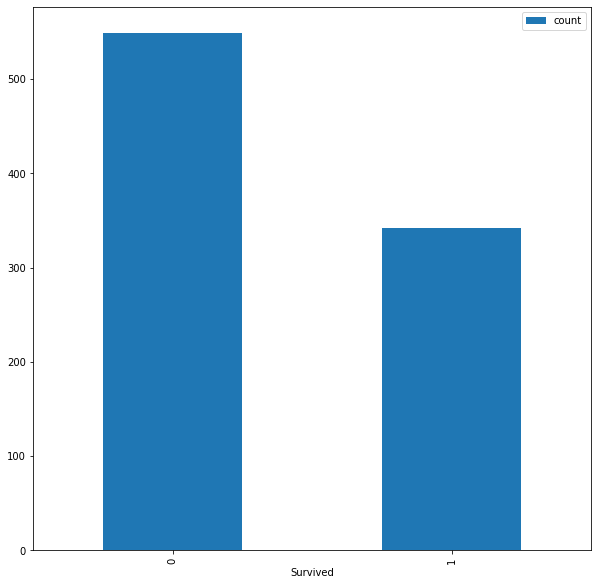

In [19]:
df.groupby('Survived')['PassengerId'].agg(
    ['count']
).reset_index().plot(x='Survived', y='count', kind = 'bar', figsize = (10, 10))

#### Survival rate depending on genre

In [20]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].agg(['count'])

count
Survived Sex          
0        female     81
         male      468
1        female    233
         male      109

In [23]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].agg(['count']).unstack()

count     
Sex      female male
Survived            
0            81  468
1           233  109

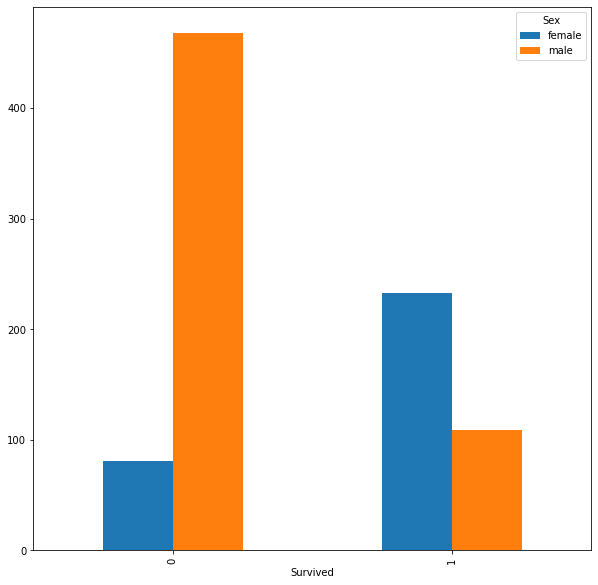

In [ ]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Ticket class

In [28]:
df.groupby(['Age', 'Pclass'])['PassengerId'].agg(
    ['count']
)

,,count
Age,Pclass,
0.42,3,1
0.67,2,1
0.75,3,2
0.83,2,2
0.92,1,1
...,...,...
70.00,2,1
70.50,3,1
71.00,1,2


In [ ]:
df.groupby(['Survived', 'Pclass'])['PassengerId'].count().unstack()

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


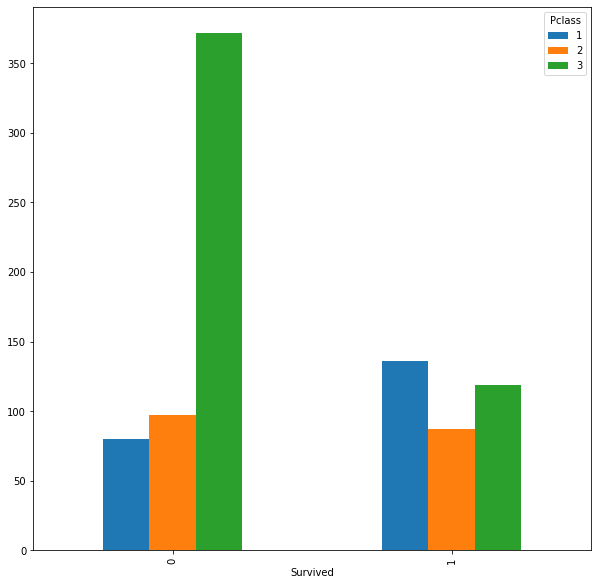

In [25]:
df.groupby(
    ['Survived', 'Pclass']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Age

In [ ]:
df['generation'] = pd.cut(df['Age'], 8)

In [ ]:
# [(0.34, 10.368] 
# (10.368, 20.315] 
# (20.315, 30.263] 
# (30.263, 40.21] 
# (40.21, 50.158] 
# (50.158, 60.105] 
# (60.105, 70.052] 
# (70.052, 80.0]]

pd.cut(df['Age'], 8)

0      (20.315, 30.263]
1       (30.263, 40.21]
2      (20.315, 30.263]
3       (30.263, 40.21]
4       (30.263, 40.21]
             ...       
886    (20.315, 30.263]
887    (10.368, 20.315]
888                 NaN
889    (20.315, 30.263]
890     (30.263, 40.21]
Name: Age, Length: 891, dtype: category
Categories (8, interval[float64]): [(0.34, 10.368] < (10.368, 20.315] < (20.315, 30.263] < (30.263, 40.21] < (40.21, 50.158] < (50.158, 60.105] < (60.105, 70.052] < (70.052, 80.0]]

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,generation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.315, 30.263]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.263, 40.21]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.315, 30.263]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.263, 40.21]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.263, 40.21]"


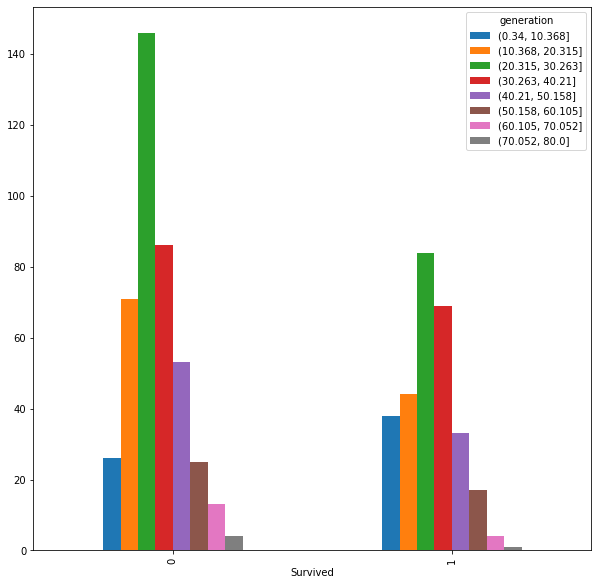

In [ ]:
df.groupby(
    ['Survived', 'generation']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Fare

In [ ]:
df['fare_category'] = pd.cut(df['Fare'], 12)

In [ ]:
pd.cut(df['Fare'], 10)

0       (-0.512, 51.233]
1      (51.233, 102.466]
2       (-0.512, 51.233]
3      (51.233, 102.466]
4       (-0.512, 51.233]
             ...        
886     (-0.512, 51.233]
887     (-0.512, 51.233]
888     (-0.512, 51.233]
889     (-0.512, 51.233]
890     (-0.512, 51.233]
Name: Fare, Length: 891, dtype: category
Categories (10, interval[float64]): [(-0.512, 51.233] < (51.233, 102.466] < (102.466, 153.699] < (153.699, 204.932] ... (307.398, 358.63] < (358.63, 409.863] < (409.863, 461.096] < (461.096, 512.329]]

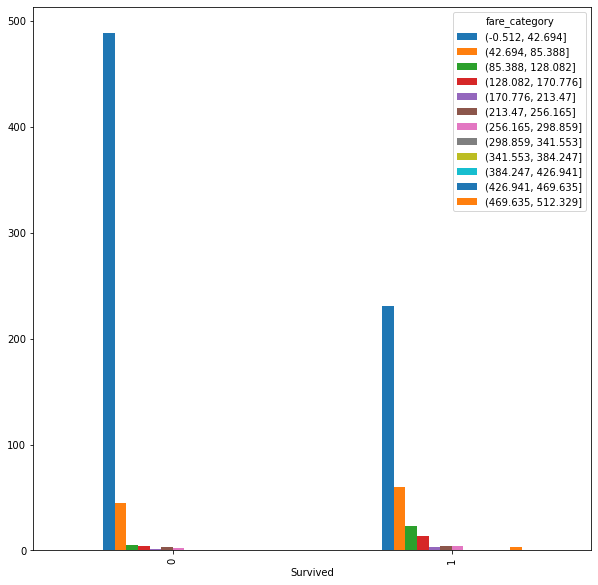

In [ ]:
df.groupby(
    ['Survived', 'fare_category']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### What about correlations?

In [ ]:
df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr()

,Survived,Pclass,Age,Fare,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,0.096067,-0.308247,-0.189119
Fare,0.257307,-0.549500,0.096067,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,-0.308247,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.216225,0.414838,1.000000


In [ ]:
df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr().style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,Fare,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,0.096067,-0.308247,-0.189119
Fare,0.257307,-0.549500,0.096067,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,-0.308247,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.216225,0.414838,1.000000


## Questions:

##### Cabins on the port side have an even number and cabins on the starboard side have an odd number. 

#### For example, cabin B57 is located on the starboard side.

#### Which side of the boat is better to be on? 


#### The deck number of the boat is indicated on the ticket. Cabin B57 is located on deck B. Which deck is best to be on?

#### Where is the best place to be on the boat in general?

#### Is there a link between the number of parents/family on the boat and chances of survival?

#### What is the typical profile of the person who will survive the shipwreck?

#### What is the typical profile of the person who will not survive the shipwreck?